# World Bank - Foreign Aid Summarizing
Reduced '.csv' files from WB_data Notebook

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
from matplotlib import cbook
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import time


# Import the Geoapify API key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# WB data set
WB_africadata_2000 = Path("Resources\WB_africadata_2000.csv")

In [3]:
# Read data file with the Pandas library
# encoding?, i.e encoding="ISO-8859-1"
WB_africadata_2000_df = pd.read_csv(WB_africadata_2000)

In [4]:
WB_africadata_2000_df

,series_id,country_code,country_name,year,value
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05
...,...,...,...,...,...
652157,VA.NO.SRC,WSM,Samoa,2006,3.000000e+00
652158,FM.LBL.BMNY.GD.ZS,TCD,Chad,2010,1.146678e+01
652159,NE.CON.PRVT.CN.AD,SDN,Sudan,2000,2.199464e+10
652160,NE.CON.PRVT.CN.AD,SDN,Sudan,2003,3.190503e+10


# World Bank Data Source Break-down
###The 'WB_africadata_2000.csv' created in the WB_data notebook will be used to summarize the Foreign Aid data.

###To help with the anlysis of the data, the data was put in bins of 5 years from 2000 to 2020, and a last bin for 2021 to 2022.

In [5]:
WB_africadata_2000_df[["year"]].min()

year    2000
dtype: int64

In [6]:
WB_africadata_2000_df[["year"]].max()

year    2023
dtype: int64

In [7]:
WB_africadata_2000_df2 = WB_africadata_2000_df

In [ ]:
# Create bins in which to place values based upon IMDB vote count
bins = [0, 2005, 2010, 2015, 2020, 2023]

# Create labels for these bins
group_labels = ["2000 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2023"]

In [ ]:
# Slice the data and place it into bins
pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

In [ ]:
WB_africadata_2000_df2["Year Group"] = pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

In [ ]:
#WB_africadata_2000_df2

In [ ]:
country_counts = WB_africadata_2000_df2['country_name'].value_counts()

print("Counts of entries for each country name:")
print(country_counts)

# Slicing of the Data
###In order to analyze the data and to understand the impact of the Foreign Aid with regards to poverty rate, literacy and mortality, the data was sliced by the "series_id". The deifinition of the diferent "series_id" values (indicators) is described in a second file downloaded from the Nasdaq API and saved as 'WB_metadata_df'.

###To facilitate/expedite the search and filtering of the relevant a function was created to search the text strings : "key_word". This function is case sensitive and it's used is combined with the review of the search output selection to identify the indicators that best match our work objective.

In [8]:
# WB id series definition data set
WB_metadata = Path("Resources/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv")

In [9]:
# Read data file with the Pandas library
WB_metadata_df = pd.read_csv(WB_metadata)

In [10]:
WB_metadata_df

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
3,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
4,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
...,...,...,...
1479,SL.TLF.BASC.FE.ZS,"Labor force with basic education, female (% of...",The ratio of the labor force with basic educat...
1480,SL.GDP.PCAP.EM.KD,GDP per person employed (constant 2021 PPP $),GDP per person employed is gross domestic prod...
1481,SL.TLF.INTM.MA.ZS,"Labor force with intermediate education, male ...",The ratio of the labor force with intermediate...
1482,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or..."


In [11]:
# This function will search within a text string for a given 'key word'. It is case sensitive

def key_word(df, search_col, word_txt, result_col):
    i=0   
    result_ls = []
    for item in df[search_col]:
        text_ls = [x.strip() for x in df[search_col][i].split()]
        if word_txt in text_ls:
            result_ls.append(df[result_col][i])
        i+=1
    if i >= df[search_col].count():
        if len(result_ls) > 0:
            return result_ls
        else:
            return print("Keyword Not found")

In [12]:
aid_search = key_word(WB_metadata_df, 'name', 'aid', 'series_id')

In [ ]:
#len(aid_search)

In [ ]:
#aid_search

In [13]:
WB_aid_df = WB_africadata_2000_df2[WB_africadata_2000_df2["series_id"].isin(aid_search)]

In [ ]:
#WB_aid_df[["year"]].min()

In [ ]:
#WB_aid_df[["year"]].max()

In [14]:
WB_aid_df

,series_id,country_code,country_name,year,value
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06
...,...,...,...,...,...
651512,DC.DAC.SVNL.CD,TUN,Tunisia,2019,4.000000e+04
651956,DC.DAC.FRAL.CD,GHA,Ghana,2005,3.790000e+07
651967,DC.DAC.FRAL.CD,TCD,Chad,2010,4.065000e+07
652143,DC.DAC.POLL.CD,RWA,Rwanda,2013,1.400000e+05


In [15]:
WB_aid_groups = WB_aid_df.groupby(['country_name','year'])['value'].sum()

WB_aid_groups

country_name  year
Angola        2000    1.264020e+09
              2001    1.242170e+09
              2002    1.759030e+09
              2003    2.051470e+09
              2004    4.767360e+09
                          ...     
Zimbabwe      2018    2.723030e+09
              2019    2.922340e+09
              2020    3.408850e+09
              2021    3.260680e+09
              2022    2.620200e+09
Name: value, Length: 713, dtype: float64

In [16]:
WB_aid_groups2 = WB_aid_groups.reset_index()

In [17]:
aid_table = WB_aid_groups2.pivot(index='year', columns='country_name', values='value')
aid_table

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,1.264020e+09,1.340900e+08,1.048580e+09,3.028200e+08,4.898000e+08,2.675800e+08,5.949460e+09,2.687640e+09,4.889000e+07,2.266500e+09,...,1.781400e+09,7.238300e+08,4.403000e+08,8.013600e+08,4.272150e+09,2.898200e+08,1.023130e+09,3.445760e+09,3.082670e+09,8.142600e+08
2001,1.242170e+09,1.225300e+08,1.555170e+09,3.234500e+08,7.313400e+08,2.264600e+08,5.694220e+09,3.818770e+09,3.438000e+07,2.494700e+09,...,1.622930e+09,1.303290e+09,6.342500e+08,7.783200e+08,5.302940e+09,1.884600e+08,1.712300e+09,3.087800e+09,2.123760e+09,7.283000e+08
2002,1.759030e+09,1.666200e+08,1.751830e+09,2.403300e+08,8.163700e+08,2.652400e+08,5.635240e+09,4.590960e+09,3.222500e+08,2.645900e+09,...,1.735400e+09,1.474980e+09,6.534100e+08,1.281920e+09,5.222390e+09,2.194100e+08,9.878400e+08,2.880270e+09,2.991970e+09,8.717700e+08
2003,2.051470e+09,1.187900e+08,1.984150e+09,1.946300e+08,8.689100e+08,2.729900e+08,4.106150e+09,6.242520e+09,-5.346000e+07,3.425880e+09,...,1.785440e+09,1.266870e+09,7.351300e+08,2.644230e+09,6.352000e+09,2.205900e+08,1.284600e+09,3.731400e+09,3.164210e+09,7.895700e+08
2004,4.767360e+09,1.793700e+08,2.293860e+09,4.245200e+08,1.181890e+09,2.319600e+08,6.167180e+09,6.440020e+09,1.552100e+08,5.106280e+09,...,3.991270e+09,1.292470e+09,8.094300e+08,4.125700e+09,6.334600e+09,2.617400e+08,1.361420e+09,4.351780e+09,4.233770e+09,8.082500e+08
2005,1.555180e+09,2.050500e+08,2.428970e+09,3.413900e+08,1.358250e+09,2.760500e+08,4.080680e+09,7.051800e+09,1.979900e+08,3.919870e+09,...,2.497980e+09,1.174500e+09,9.410300e+08,7.503430e+09,5.332120e+09,3.160200e+08,1.516780e+09,4.217350e+09,4.474630e+09,1.279370e+09
2006,5.575600e+08,2.756100e+08,3.001130e+09,4.503900e+08,1.057630e+09,4.316300e+08,3.549220e+09,6.885890e+09,1.358900e+08,3.988150e+09,...,2.970250e+09,1.290430e+09,1.567810e+09,8.183240e+09,6.455920e+09,3.033400e+08,1.803700e+09,5.643320e+09,5.654470e+09,1.107100e+09
2007,7.998300e+08,4.231300e+08,2.828970e+09,6.665400e+08,1.324750e+09,3.731800e+08,4.551500e+09,7.867030e+09,1.943800e+08,3.492530e+09,...,2.612310e+09,1.954630e+09,1.488960e+09,8.368020e+09,8.828090e+09,4.456700e+08,1.311930e+09,5.096000e+09,3.514990e+09,1.866270e+09
2008,1.239280e+09,2.944200e+09,2.893750e+09,8.419200e+08,1.808880e+09,4.212900e+08,5.954060e+09,1.032913e+10,2.295300e+08,3.784470e+09,...,3.270920e+09,1.098200e+09,2.990110e+09,9.536690e+09,6.984580e+09,9.888200e+08,1.413070e+09,5.531530e+09,3.840530e+09,2.473630e+09


In [18]:
Aid_table = aid_table.reset_index()

In [19]:
Aid_table 

country_name,year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,2000,1.264020e+09,1.340900e+08,1.048580e+09,3.028200e+08,4.898000e+08,2.675800e+08,5.949460e+09,2.687640e+09,4.889000e+07,...,1.781400e+09,7.238300e+08,4.403000e+08,8.013600e+08,4.272150e+09,2.898200e+08,1.023130e+09,3.445760e+09,3.082670e+09,8.142600e+08
1,2001,1.242170e+09,1.225300e+08,1.555170e+09,3.234500e+08,7.313400e+08,2.264600e+08,5.694220e+09,3.818770e+09,3.438000e+07,...,1.622930e+09,1.303290e+09,6.342500e+08,7.783200e+08,5.302940e+09,1.884600e+08,1.712300e+09,3.087800e+09,2.123760e+09,7.283000e+08
2,2002,1.759030e+09,1.666200e+08,1.751830e+09,2.403300e+08,8.163700e+08,2.652400e+08,5.635240e+09,4.590960e+09,3.222500e+08,...,1.735400e+09,1.474980e+09,6.534100e+08,1.281920e+09,5.222390e+09,2.194100e+08,9.878400e+08,2.880270e+09,2.991970e+09,8.717700e+08
3,2003,2.051470e+09,1.187900e+08,1.984150e+09,1.946300e+08,8.689100e+08,2.729900e+08,4.106150e+09,6.242520e+09,-5.346000e+07,...,1.785440e+09,1.266870e+09,7.351300e+08,2.644230e+09,6.352000e+09,2.205900e+08,1.284600e+09,3.731400e+09,3.164210e+09,7.895700e+08
4,2004,4.767360e+09,1.793700e+08,2.293860e+09,4.245200e+08,1.181890e+09,2.319600e+08,6.167180e+09,6.440020e+09,1.552100e+08,...,3.991270e+09,1.292470e+09,8.094300e+08,4.125700e+09,6.334600e+09,2.617400e+08,1.361420e+09,4.351780e+09,4.233770e+09,8.082500e+08
5,2005,1.555180e+09,2.050500e+08,2.428970e+09,3.413900e+08,1.358250e+09,2.760500e+08,4.080680e+09,7.051800e+09,1.979900e+08,...,2.497980e+09,1.174500e+09,9.410300e+08,7.503430e+09,5.332120e+09,3.160200e+08,1.516780e+09,4.217350e+09,4.474630e+09,1.279370e+09
6,2006,5.575600e+08,2.756100e+08,3.001130e+09,4.503900e+08,1.057630e+09,4.316300e+08,3.549220e+09,6.885890e+09,1.358900e+08,...,2.970250e+09,1.290430e+09,1.567810e+09,8.183240e+09,6.455920e+09,3.033400e+08,1.803700e+09,5.643320e+09,5.654470e+09,1.107100e+09
7,2007,7.998300e+08,4.231300e+08,2.828970e+09,6.665400e+08,1.324750e+09,3.731800e+08,4.551500e+09,7.867030e+09,1.943800e+08,...,2.612310e+09,1.954630e+09,1.488960e+09,8.368020e+09,8.828090e+09,4.456700e+08,1.311930e+09,5.096000e+09,3.514990e+09,1.866270e+09
8,2008,1.239280e+09,2.944200e+09,2.893750e+09,8.419200e+08,1.808880e+09,4.212900e+08,5.954060e+09,1.032913e+10,2.295300e+08,...,3.270920e+09,1.098200e+09,2.990110e+09,9.536690e+09,6.984580e+09,9.888200e+08,1.413070e+09,5.531530e+09,3.840530e+09,2.473630e+09
9,2009,8.198500e+08,1.134090e+09,2.990150e+09,7.432900e+08,2.108780e+09,5.290500e+08,3.595850e+09,9.895930e+09,2.791400e+08,...,3.103620e+09,1.450390e+09,2.590270e+09,9.253540e+09,7.876600e+09,1.824290e+09,1.898240e+09,5.205600e+09,4.266810e+09,2.968820e+09


In [20]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
Aid_table.to_csv("Resources\Aid_table.csv", encoding="utf-8", index=False)

In [21]:
data3 = {
    '2000 Total Foreign Aid (USD millions)': (aid_table.iloc[0, 0:31]/1_000_000),
    '2022 Total Foreign Aid (USD millions)': (aid_table.iloc[-1, 0:31]/1_000_000)   
}
summary_table3 = pd.DataFrame(data3)
summary_table3

,2000 Total Foreign Aid (USD millions),2022 Total Foreign Aid (USD millions)
country_name,,
Angola,1264.019978,377.160009
Botswana,134.089999,305.799995
Burkina Faso,1048.580002,4415.510057
Central African Republic,302.819999,2166.040022
Chad,489.799994,2245.049972
Djibouti,267.580001,301.839998
"Egypt, Arab Rep.",5949.459961,13496.160319
Ethiopia,2687.640014,15778.120350
Gabon,48.890000,524.469993


In [22]:
summary_table3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Angola to Zimbabwe
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   2000 Total Foreign Aid (USD millions)  31 non-null     float64
 1   2022 Total Foreign Aid (USD millions)  31 non-null     float64
dtypes: float64(2)
memory usage: 744.0+ bytes


In [23]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
summary_table3.to_csv("Resources\WB_aid_summary.csv", encoding="utf-8", index=False)

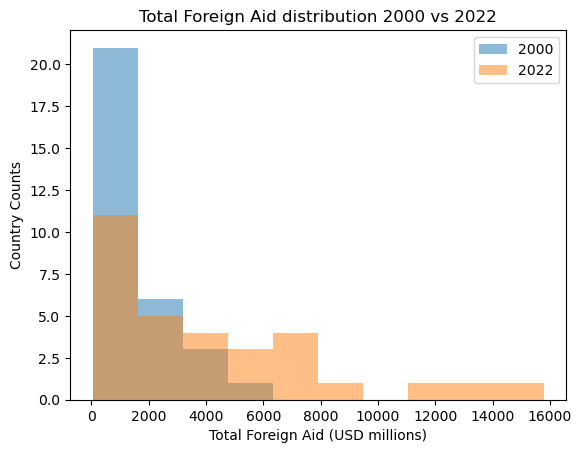

<Figure size 640x480 with 0 Axes>

In [24]:
# Create a sample DataFrame
data4 = {
    '2000': (summary_table3['2000 Total Foreign Aid (USD millions)']),
    '2022': (summary_table3['2022 Total Foreign Aid (USD millions)'])
}
df = pd.DataFrame(data4)

# Plot overlapping histograms
df.plot.hist(alpha=0.5, bins=10)
plt.title ("Total Foreign Aid distribution 2000 vs 2022")
plt.xlabel('Total Foreign Aid (USD millions)')
plt.ylabel('Country Counts')
plt.show()

# Save the figure
plt.savefig("Output/Fig1_Aid Histogram.png")


In [25]:
# WB id series definition data set
summary_table2 = Path("Resources/WB_population_summary.csv")

In [26]:
# Read data file with the Pandas library
summary_table2 = pd.read_csv(summary_table2)

In [27]:
summary_table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   2000 Total Population (millions)  31 non-null     float64
 1   2022 Total Population (millions)  31 non-null     float64
dtypes: float64(2)
memory usage: 624.0 bytes


In [ ]:
#Foreign Aid only has data until 2022 - this method doesn't work, maybe merge?
#summary_table2['2000 Total Foreign Aid (USD millions)'] = [aid_table.iloc[0, 0:31]]
#summary_table2['2023 Total Foreign Aid (USD millions)'] = [aid_table.iloc[-1, 0:31]]
#summary_table2

In [28]:
# Upload data generated by WP_Population_upd.py
TOT_table = Path("Resources/TOT_table.csv")

In [29]:
# Read data file with the Pandas library
TOT_pop_table = pd.read_csv(TOT_table)

In [30]:
TOT_pop_table2 = TOT_pop_table.drop(23)
TOT_pop_table2

,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,19665502.0,...,9704287.0,4584067.0,8721465.0,26298773.0,34463704.0,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0
1,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,20195577.0,...,9938027.0,4857096.0,9070747.0,26947253.0,35414469.0,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0
2,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,20758326.0,...,10180950.0,5140113.0,9411103.0,27570318.0,36353531.0,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0
3,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,21329514.0,...,10434504.0,5350907.0,9758281.0,28188977.0,37333918.0,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0
4,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,21906444.0,...,10698691.0,5533329.0,10117354.0,28831550.0,38360879.0,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0
5,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,22496951.0,...,10974057.0,5683334.0,10467292.0,29540577.0,39439505.0,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0
6,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,23098586.0,...,11263387.0,5809774.0,10784973.0,30332968.0,40562052.0,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0
7,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,23708320.0,...,11563869.0,5939163.0,11118092.0,31191163.0,41716497.0,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0
8,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,24326087.0,...,11872929.0,6090860.0,11444870.0,32065241.0,42870884.0,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0
9,22507674.0,2048997.0,15650022.0,4564540.0,11496128.0,901103.0,85501064.0,86755585.0,1653542.0,24950762.0,...,12195029.0,6259842.0,11730037.0,32948155.0,43957933.0,6398624.0,10784504.0,31412520.0,13318087.0,12679810.0


In [31]:
TOT_pop_table2.insert(0, "Year", aid_table.index)
TOT_pop_table2

,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,2000,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,...,9704287.0,4584067.0,8721465.0,26298773.0,34463704.0,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0
1,2001,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,...,9938027.0,4857096.0,9070747.0,26947253.0,35414469.0,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0
2,2002,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,...,10180950.0,5140113.0,9411103.0,27570318.0,36353531.0,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0
3,2003,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,...,10434504.0,5350907.0,9758281.0,28188977.0,37333918.0,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0
4,2004,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,...,10698691.0,5533329.0,10117354.0,28831550.0,38360879.0,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0
5,2005,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,...,10974057.0,5683334.0,10467292.0,29540577.0,39439505.0,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0
6,2006,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,...,11263387.0,5809774.0,10784973.0,30332968.0,40562052.0,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0
7,2007,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,...,11563869.0,5939163.0,11118092.0,31191163.0,41716497.0,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0
8,2008,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,...,11872929.0,6090860.0,11444870.0,32065241.0,42870884.0,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0
9,2009,22507674.0,2048997.0,15650022.0,4564540.0,11496128.0,901103.0,85501064.0,86755585.0,1653542.0,...,12195029.0,6259842.0,11730037.0,32948155.0,43957933.0,6398624.0,10784504.0,31412520.0,13318087.0,12679810.0


In [32]:
TOT_pop_table2["Total Population"] = TOT_pop_table.sum(axis=1)
TOT_pop_table2


,Year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe,Total Population
0,2000,16394062.0,1726985.0,11882888.0,3759170.0,8259137.0,742033.0,71371371.0,67031867.0,1272935.0,...,4584067.0,8721465.0,26298773.0,34463704.0,5008035.0,9893316.0,24020697.0,9891136.0,11834676.0,561470587.0
1,2001,16941587.0,1761930.0,12249764.0,3844773.0,8538804.0,765490.0,72854261.0,69018932.0,1306590.0,...,4857096.0,9070747.0,26947253.0,35414469.0,5145426.0,9995123.0,24763325.0,10191964.0,11910978.0,576393009.0
2,2002,17516139.0,1795130.0,12632269.0,3930648.0,8838369.0,789129.0,74393759.0,71073215.0,1341696.0,...,5140113.0,9411103.0,27570318.0,36353531.0,5281538.0,10094561.0,25545090.0,10508294.0,11984644.0,591781662.0
3,2003,18124342.0,1826863.0,13030591.0,4026841.0,9196366.0,806411.0,75963322.0,73168838.0,1378398.0,...,5350907.0,9758281.0,28188977.0,37333918.0,5421001.0,10193798.0,26354736.0,10837973.0,12075828.0,607558084.0
4,2004,18771125.0,1859085.0,13445977.0,4115138.0,9613503.0,818373.0,77522427.0,75301026.0,1417110.0,...,5533329.0,10117354.0,28831550.0,38360879.0,5565218.0,10292225.0,27146084.0,11188040.0,12160881.0,623761699.0
5,2005,19450959.0,1892807.0,13876127.0,4208834.0,10005012.0,830861.0,79075310.0,77469940.0,1458353.0,...,5683334.0,10467292.0,29540577.0,39439505.0,5711597.0,10388344.0,27946588.0,11564870.0,12224753.0,640431443.0
6,2006,20162340.0,1928704.0,14316242.0,4294352.0,10365614.0,846947.0,80629670.0,79691050.0,1502534.0,...,5809774.0,10784973.0,30332968.0,40562052.0,5874240.0,10483558.0,28773227.0,11971567.0,12330490.0,657620456.0
7,2007,20909684.0,1966977.0,14757074.0,4375569.0,10722731.0,865196.0,82218755.0,81996185.0,1549774.0,...,5939163.0,11118092.0,31191163.0,41716497.0,6047537.0,10580395.0,29629804.0,12402073.0,12450568.0,675394385.0
8,2008,21691522.0,2007320.0,15197915.0,4467233.0,11098664.0,882886.0,83844783.0,84357105.0,1599978.0,...,6090860.0,11444870.0,32065241.0,42870884.0,6222482.0,10680380.0,30509862.0,12852966.0,12550347.0,693612332.0
9,2009,22507674.0,2048997.0,15650022.0,4564540.0,11496128.0,901103.0,85501064.0,86755585.0,1653542.0,...,6259842.0,11730037.0,32948155.0,43957933.0,6398624.0,10784504.0,31412520.0,13318087.0,12679810.0,712178736.0


In [33]:
aid_table_country = WB_aid_groups2.pivot(index='country_name', columns='year', values='value')
aid_table_country

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country_name,,,,,,,,,,,,,,,,,,,,,
Angola,1.264020e+09,1.242170e+09,1.759030e+09,2.051470e+09,4.767360e+09,1.555180e+09,5.575600e+08,7.998300e+08,1.239280e+09,8.198500e+08,...,9.340200e+08,7.870300e+08,1.419110e+09,6.578700e+08,6.839400e+08,5.423800e+08,2.242600e+08,3.972700e+08,8.850200e+08,3.771600e+08
Botswana,1.340900e+08,1.225300e+08,1.666200e+08,1.187900e+08,1.793700e+08,2.050500e+08,2.756100e+08,4.231300e+08,2.944200e+09,1.134090e+09,...,4.342800e+08,4.039900e+08,2.652600e+08,3.539400e+08,3.877700e+08,3.171900e+08,2.585100e+08,3.048500e+08,3.491600e+08,3.058000e+08
Burkina Faso,1.048580e+09,1.555170e+09,1.751830e+09,1.984150e+09,2.293860e+09,2.428970e+09,3.001130e+09,2.828970e+09,2.893750e+09,2.990150e+09,...,3.569450e+09,3.792110e+09,3.231290e+09,3.247480e+09,3.062310e+09,3.726470e+09,3.701530e+09,5.430370e+09,5.010880e+09,4.415510e+09
Central African Republic,3.028200e+08,3.234500e+08,2.403300e+08,1.946300e+08,4.245200e+08,3.413900e+08,4.503900e+08,6.665400e+08,8.419200e+08,7.432900e+08,...,7.092500e+08,2.119940e+09,1.845740e+09,1.852780e+09,1.771640e+09,2.113720e+09,2.261950e+09,2.662290e+09,2.138980e+09,2.166040e+09
Chad,4.898000e+08,7.313400e+08,8.163700e+08,8.689100e+08,1.181890e+09,1.358250e+09,1.057630e+09,1.324750e+09,1.808880e+09,2.108780e+09,...,1.660270e+09,1.390700e+09,2.094440e+09,1.988760e+09,2.094560e+09,2.768430e+09,2.079940e+09,3.021770e+09,2.273560e+09,2.245050e+09
Djibouti,2.675800e+08,2.264600e+08,2.652400e+08,2.729900e+08,2.319600e+08,2.760500e+08,4.316300e+08,3.731800e+08,4.212900e+08,5.290500e+08,...,5.135900e+08,5.599500e+08,5.636100e+08,5.606500e+08,4.757400e+08,5.672700e+08,8.399700e+08,7.481500e+08,4.895800e+08,3.018400e+08
"Egypt, Arab Rep.",5.949460e+09,5.694220e+09,5.635240e+09,4.106150e+09,6.167180e+09,4.080680e+09,3.549220e+09,4.551500e+09,5.954060e+09,3.595850e+09,...,1.154155e+10,7.727810e+09,5.991480e+09,6.346280e+09,5.031700e+08,5.898500e+09,5.621300e+09,5.181470e+09,2.123570e+10,1.349616e+10
Ethiopia,2.687640e+09,3.818770e+09,4.590960e+09,6.242520e+09,6.440020e+09,7.051800e+09,6.885890e+09,7.867030e+09,1.032913e+10,9.895930e+09,...,1.198721e+10,1.162715e+10,1.089380e+10,1.351143e+10,1.359282e+10,1.492361e+10,1.451494e+10,1.606175e+10,1.347548e+10,1.577812e+10
Gabon,4.889000e+07,3.438000e+07,3.222500e+08,-5.346000e+07,1.552100e+08,1.979900e+08,1.358900e+08,1.943800e+08,2.295300e+08,2.791400e+08,...,3.366100e+08,4.311700e+08,3.956500e+08,1.558800e+08,4.321700e+08,4.563300e+08,4.895900e+08,2.015100e+08,3.708000e+08,5.244700e+08


In [34]:
aid_table_country = aid_table_country.reset_index()
aid_table_country

year,country_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Angola,1.264020e+09,1.242170e+09,1.759030e+09,2.051470e+09,4.767360e+09,1.555180e+09,5.575600e+08,7.998300e+08,1.239280e+09,...,9.340200e+08,7.870300e+08,1.419110e+09,6.578700e+08,6.839400e+08,5.423800e+08,2.242600e+08,3.972700e+08,8.850200e+08,3.771600e+08
1,Botswana,1.340900e+08,1.225300e+08,1.666200e+08,1.187900e+08,1.793700e+08,2.050500e+08,2.756100e+08,4.231300e+08,2.944200e+09,...,4.342800e+08,4.039900e+08,2.652600e+08,3.539400e+08,3.877700e+08,3.171900e+08,2.585100e+08,3.048500e+08,3.491600e+08,3.058000e+08
2,Burkina Faso,1.048580e+09,1.555170e+09,1.751830e+09,1.984150e+09,2.293860e+09,2.428970e+09,3.001130e+09,2.828970e+09,2.893750e+09,...,3.569450e+09,3.792110e+09,3.231290e+09,3.247480e+09,3.062310e+09,3.726470e+09,3.701530e+09,5.430370e+09,5.010880e+09,4.415510e+09
3,Central African Republic,3.028200e+08,3.234500e+08,2.403300e+08,1.946300e+08,4.245200e+08,3.413900e+08,4.503900e+08,6.665400e+08,8.419200e+08,...,7.092500e+08,2.119940e+09,1.845740e+09,1.852780e+09,1.771640e+09,2.113720e+09,2.261950e+09,2.662290e+09,2.138980e+09,2.166040e+09
4,Chad,4.898000e+08,7.313400e+08,8.163700e+08,8.689100e+08,1.181890e+09,1.358250e+09,1.057630e+09,1.324750e+09,1.808880e+09,...,1.660270e+09,1.390700e+09,2.094440e+09,1.988760e+09,2.094560e+09,2.768430e+09,2.079940e+09,3.021770e+09,2.273560e+09,2.245050e+09
5,Djibouti,2.675800e+08,2.264600e+08,2.652400e+08,2.729900e+08,2.319600e+08,2.760500e+08,4.316300e+08,3.731800e+08,4.212900e+08,...,5.135900e+08,5.599500e+08,5.636100e+08,5.606500e+08,4.757400e+08,5.672700e+08,8.399700e+08,7.481500e+08,4.895800e+08,3.018400e+08
6,"Egypt, Arab Rep.",5.949460e+09,5.694220e+09,5.635240e+09,4.106150e+09,6.167180e+09,4.080680e+09,3.549220e+09,4.551500e+09,5.954060e+09,...,1.154155e+10,7.727810e+09,5.991480e+09,6.346280e+09,5.031700e+08,5.898500e+09,5.621300e+09,5.181470e+09,2.123570e+10,1.349616e+10
7,Ethiopia,2.687640e+09,3.818770e+09,4.590960e+09,6.242520e+09,6.440020e+09,7.051800e+09,6.885890e+09,7.867030e+09,1.032913e+10,...,1.198721e+10,1.162715e+10,1.089380e+10,1.351143e+10,1.359282e+10,1.492361e+10,1.451494e+10,1.606175e+10,1.347548e+10,1.577812e+10
8,Gabon,4.889000e+07,3.438000e+07,3.222500e+08,-5.346000e+07,1.552100e+08,1.979900e+08,1.358900e+08,1.943800e+08,2.295300e+08,...,3.366100e+08,4.311700e+08,3.956500e+08,1.558800e+08,4.321700e+08,4.563300e+08,4.895900e+08,2.015100e+08,3.708000e+08,5.244700e+08
9,Ghana,2.266500e+09,2.494700e+09,2.645900e+09,3.425880e+09,5.106280e+09,3.919870e+09,3.988150e+09,3.492530e+09,3.784470e+09,...,4.215620e+09,3.576670e+09,5.346110e+09,4.188250e+09,3.923370e+09,3.620690e+09,3.011950e+09,5.888750e+09,4.109440e+09,3.148980e+09


In [37]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
aid_table_country.to_csv("Resources/aid_table_country.csv", encoding="utf-8", index=False)